# Homework #04

## PHYS 2600, Spring 2019

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend restarting the kernel and selecting "Cells > Run All" in the menu above before you submit.

In [2]:
## Import cell

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

## 4.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on your _last graded_ homework assignment.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

For the sixth problem, the third value is the default value 2 we defined in the function def G(x, y=1, z=2)

## 4.1 - More Boolean logic (12 points)

For the problems below, you should __write a Boolean test function__, i.e. a function that returns a Boolean value `True` or `False`.
 
### Part A (4 points)

Implement the function `both_are_odd(x,y)`, which should return `True` if both `x` and `y` are odd numbers (i.e. not divisible by 2), and `False` otherwise.

In [3]:
def both_are_odd(x,y):
    ## YOUR CODE HERE
    if x%2==1 and y%2==1: 
        return True
    else:
        return False


In [4]:
assert not both_are_odd(2,3)
assert both_are_odd(5,7)
assert not both_are_odd(6,18)

### Part B (4 points)

Implement the function `close_to_sqrt(x,y,tol)`, which should check whether either number is the square root of the other number.  (Specifically, it should return `True` if $x^2$ is within `tol` of $y$ or if $y^2$ is within `tol` if $x$.)

In [5]:
## YOUR CODE HERE
def close_to_sqrt(x, y, tol=0):
    return abs(x*x - y) <= tol or abs(y*y - x) <= tol



In [6]:
assert close_to_sqrt(5.0, 25.0)
assert not close_to_sqrt(2.0, 9.0)
assert close_to_sqrt(36.0, 6.0)
assert close_to_sqrt(49.0, -7.0001, tol=1e-2)

### Part C (4 points)

Implement the function `are_positive_ordered(a,b,c)`, which should check to see whether __both__ $a<b<c$ and all three numbers are positive.

In [7]:
## YOUR CODE HERE
def are_positive_ordered(a,b,c):
    if(a<b and a<c and b<c and a>0 and b>0 and c>0):
        return True
    else:
        return False

In [8]:
assert not are_positive_ordered(4,3,5)
assert not are_positive_ordered(-7,3,7)
assert are_positive_ordered(3,5,9)
assert not are_positive_ordered(0,1,1)
assert not are_positive_ordered(1,10,-100)

## 4.2 - Working with integrals (9 points)

For this problem you'll be evaluating some integrals numerically, using the `np.trapz` function.  Choosing the number of points for your discrete grid is up to you - but your answers _should be accurate to within 0.1%_ of the exact result.  __Check that your answer is accurate, and use more points in your grid if it's not, or you will lose points!!__

_(Hint: how can you check your answer?  Remember, a simple test is just to increase the number of points on your grid, and see if the answer changes or not.  This generally works even for cases where you don't know the right answer.)_

_(Another hint: the first integral is easy to work out by hand, so you know the right answer...the second integral also has an analytic answer, although it's harder to get.)_ 

### Part A (3 points)

Evaluate the integral:

\\[
I = \int_0^4 \left[3x^2 - 4\right] dx \\
\\]

__Save your numerical answer to the variable `integral_I`.__  The visible testing cell will do a simple check that your integral is positive, it's up to you to verify the answer...

In [9]:
integral_I = 0.


## YOUR CODE HERE
x = np.linspace(0,4,1000)
y = 3*x**2-4

integral_I = np.trapz(y,x)

In [10]:
# Basic sanity check - not a thorough test!
print(integral_I)
assert integral_I > 0.

48.000032064096125


In [11]:
# Hidden testing cell - do not delete!
import numpy.testing as npt



### Part B (3 points)

Evaluate the integral:

\\[
J = \int_0^{2\pi} \cos(2x) e^{x/2} dx \\
\\]

__Save your numerical answer to the variable `integral_J.__  The visible testing cell will do a simple check that your integral is positive, it's up to you to verify the answer...

In [12]:
from math import pi,cos,e
integral_I = 0.
integral_J = 0.
integral_K = 0.

## YOUR CODE HERE
x = np.linspace(0,2*np.pi,1000)
y = [cos(2*i)*e**(i/2) for i in x]
integral_J = np.trapz(y,x)

In [13]:
# Basic sanity check - not a thorough test!
print(integral_J)
assert integral_J > 0.

2.6048238617739012


In [14]:
# Hidden testing cell - do not delete!


### Part C (3 points)

Evaluate the integral:

\\[
K = \int_{-1}^{1} \frac{\sin(500x)}{x} dx
\\]

__Save your numerical answer to the variable `integral_K`.__  The visible testing cell will do a simple check that your integral is positive, it's up to you to verify the answer...

_(Hint: integral K is oscillating back and forth pretty badly - you need to be especially careful that you used enough points here!)_

In [15]:
from math import sin 
integral_K = 0.

## YOUR CODE HERE
x = np.linspace(-1,1,1000)
y = [sin(500*i)/i for i in x]
integral_K = np.trapz(y,x)
print(integral_K)

3.1448318362425205


In [16]:
# Basic sanity check - not a thorough test!
print(integral_K)
assert integral_K > 0.

3.1448318362425205


In [17]:
# Hidden testing cell - do not delete!
import numpy.testing as npt


## 4.3 - Pendulum motion beyond small angles (16 points)

The motion of a simple pendulum is given by the differential equation

\\[
\frac{d^2 \theta}{dt^2} = -\frac{g}{L} \sin \theta
\\]

where $\theta$ is the angle of the pendulum with the vertical, so at $\theta = 0$ the pendulum hangs straight down.  If we make the _small-angle approximation_ $\sin \theta \approx \theta$, then we can solve the equation and find $\theta(t)$.  This gives us the expression for the period $T$, which is the time for the pendulum to complete one cycle:
\\[
T = 2\pi \sqrt{\frac{L}{g}}.
\\]

Without the small-angle approximation, there is no analytic solution to the pendulum equation!  However, the equation is _integrable_; we can solve its motion in terms of (difficult) integrals.  In particular, the general formula for the period of a pendulum is

\\[
T = 4 \sqrt{\frac{L}{2g}} \int_0^{\theta_0} \frac{1}{\cos \theta - \cos \theta_0} d\theta
\\]

This integral has no analytic solution, but we can try to do it numerically.

### Part A (6 points)

Let's start by rewriting the formula above as two different pieces:
\\[
T = 4 \sqrt{\frac{L}{2g}} \int_0^{\theta_0} I(\theta, \theta_0)\ d\theta \\
I(\theta, \theta_0) = \frac{1}{\cos \theta - \cos \theta_0}
\\]

It will be instructive to look at the __integrand__ $I(\theta, \theta_0)$ itself, _before_ we actually try to do the integral.  We can already see that $I$ will blow up when $\theta = \theta_0$, as the denominator becomes zero.

We can't let division by zero happen in our numerical integration, so let's solve the problem by introducing a __cutoff__ to the integral.  Introducing a new parameter $\delta$, we write:

$$
T(\delta) \equiv 4 \sqrt{\frac{L}{2g}} \int_0^{\theta_0 - \delta} I(\theta, \theta_0)\ d\theta
$$
and then the answer we want is $T = \lim_{\delta \rightarrow 0} T(\delta)$.

To evaluate the integral, we need a discrete set of points $\theta$ over the range $(0, \theta_0 - \delta)$, and then the array $I(\theta, \theta_0)$ using the discrete $\theta$.  Let's set up some functions to handle that for us. 

__Implement the function `theta_discrete(theta_0, delta, num_points)` below__, which should create a discretized array of $\theta$ values from 0 to $\theta_0 - \delta$.  Also __implement `pendulum_I(theta, theta_0)`__, which should take a discrete array created by `theta_discrete` and a value of `theta_0`, and return an array for the integrand $I(\theta, \theta_0)$.

_(These should be pretty short functions!  But using functions like this helps to clarify what our intentions are when we write the program.  It also lets us specify default values for things like `delta`, while still letting us change the value later.)_

In [24]:
def theta_discrete(theta_0, delta=1e-3, num_points=1000):
    ## YOUR CODE HERE
    theta = np.linspace(0,theta_0-delta,1000)
    return theta

In [42]:
def pendulum_I(theta, theta_0):
    ## YOUR CODE HERE
    x = theta 
    I = [1/(cos(i)-cos(theta_0)) for i in x]
    return I

In [43]:
## Tests for theta_discrete and pendulum_I



Now __plot the integrand__, taking $\theta_0 = \pi/4$ and plotting the whole range of integration.  Use the default value of `\delta = 1e-3`.

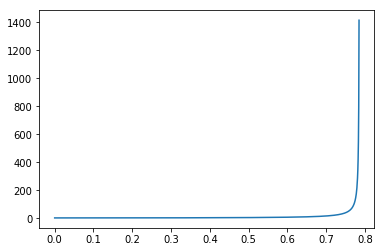

In [44]:
## YOUR CODE HERE
plt.plot(theta_discrete(pi/4, delta=1e-3, num_points=1000), pendulum_I(theta_discrete(pi/4, delta=1e-3, num_points=1000), pi/4))

### Part B (6 points)

Your plot should show that the integrand diverges at $\theta = \theta_0$ as expected.  With our cutoff $\delta$, we can evaluate the integral numerically for any $\delta > 0$.  Then we hope that we can tune $\delta$ small enough to get the answer about right!

__Implement the function `pendulum_T_cutoff(theta_0, delta, num_points)` below__, which __must__ use `pendulum_I` and `theta_discrete` from part A with `np.trapz()` to calculate and return the integral expression for the pendulum period $T$.  We'll hard-code the length $L$ to be 1 meter for simplicity.

In [51]:
def pendulum_T_cutoff(theta_0, delta=1e-3, num_points=1000):
    g = 9.8  ## m/s^2
    L = 1    ## m
    
    ## YOUR CODE HERE
    Const = 4*(L/(2*g))**(1/2)
    a = theta_discrete(pi/4, delta=1e-3, num_points=1000)
    b = pendulum_I(theta_discrete(theta_0, delta=1e-3, num_points=1000), theta_0)
    IntegralZ = np.trapz(b,a)
    T = Const*IntegralZ
    return T

In [52]:
import numpy.testing as npt

print(pendulum_T_cutoff(np.pi/32))
npt.assert_allclose(pendulum_T_cutoff(np.pi/32), 48.6, atol=0.1)
npt.assert_allclose(pendulum_T_cutoff(np.pi/32, delta=1e-5), 119.2, atol=0.1)

392.4208579708564


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0.1

(mismatch 100.0%)
 x: array(392.420858)
 y: array(48.6)

In [ ]:
# Hidden testing cell - do not delete!


Our answer should be pretty close for a small enough angle; let's try $\pi/32$.  __Run the cell below__ to use your function at this small angle for a few different values of the cutoff $\delta$.

In [53]:
print(pendulum_T_cutoff(np.pi/32))
print(pendulum_T_cutoff(np.pi/32, delta=1e-5))
print(pendulum_T_cutoff(np.pi/32, delta=1e-2))
print(pendulum_T_cutoff(np.pi/32, delta=1e-1, num_points=10000))

# Correct result for small theta, L=1 m
small_angle_T = 2*np.pi *np.sqrt(1/9.8)
print(small_angle_T)

392.4208579708564
392.4208579708564
392.4208579708564
392.4208579708564
2.007089923154493


The four numerical results from `pendulum_T` are all horribly far off, and playing with `delta` or even increasing `num_points` doesn't seem to be helping at all!  In fact, this is a fairly well-known example of __numerical instability__; the contribution of the divergent part of the integrand is so large that it's very hard to deal with just by throwing points at it or cutting it off.

### Part C (6 points)

Since the cutoff method fails badly here, we should try to change variables instead!  It's not so obvious how to find a good change here, but this is a well-known problem, so the answer is well-known too:

\\[
T = 4 \sqrt{\frac{L}{g}} \int_0^{\pi/2} \frac{d\phi}{\sqrt{1-\sin^2(\theta_0/2) \sin^2 \phi}}
\\]

This makes the integral nice and finite - the denominator doesn't blow up since $\sin^2(\theta_0/2)$ is always less than 1.  (This particular form of the integral is an example of an __elliptic integral__.)

__Implement the function `pendulum_T(theta_0, num_points)` below,__ which should use the transformed integral to calculate and return the period $T$.


In [54]:
from math import sin
def pendulum_T(theta_0, num_points=1000):
    g = 9.8  ## m/s^2
    L = 1    ## m
    
    ## YOUR CODE HERE
    Const = 4*(L/g)**(1/2)
    x = np.linspace(0,np.pi/2,1000)
    y = [1/(1-(sin(theta_0/2))**2*(sin(i))**2) for i in x]
    T = Const*np.trapz(y,x)
    return T

In [55]:
assert pendulum_T(np.pi/6) > 2.0
assert pendulum_T(3.0) > 3.0

In [56]:
# Hidden testing cell - do not delete!


Finally, __run the cell below__ to plot your numerical integral result for $T(\theta_0)$ against the small-angle answer.  You should, of course, see them come together at small $\theta_0$ - now you can see how small the angle really has to be for this approximation to work!

NameError: name 'small_angle_T' is not defined

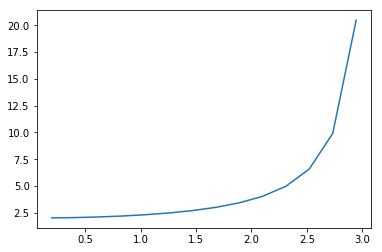

In [50]:
theta_zeros = np.linspace(np.pi/16, np.pi-np.pi/16, 14)

pT = []
for th in theta_zeros:
    pT.append(pendulum_T(th))
    
plt.plot(theta_zeros, pT)
plt.axhline(small_angle_T, color='r')
plt.xlabel('$\\theta_0$')  ## This is TeX math notation - see problem 9.3 below!
plt.ylabel('T')